<h2><center> 10-315 Intro to Machine Learning (SCS MAjors) <br> Lecture 3: Decision Trees - Overfitting </center></h2> 


<h3><center> Leila Wehbe <br> Carnegie Mellon University  <br> Machine Learning Department </center></h3> 


<br>


Lecture based on material from Tom Mitchell's [lecture 2](http://www.cs.cmu.edu/~tom/10701-S20/Intro-DTreesAndOverfitting-1-13-2020.pdf), Nina Balcan's lecture 2, and on on Kilian Weinberger's [lecture 17](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote17.html)

#### Lecture outcomes
- What is a decision tree
- How to use information gain as a heuristic to building a short tree
- Notion of overfitting

### Links (use the version you need)


- [Notebook](https://github.com/lwehbe/10315/blob/F24/Lecture_03_decision_trees.ipynb)

- [PDF slides](https://github.com/lwehbe/10315/raw/F24/Lecture_03_decision_trees.pdf)

### Supervised Learning Problem Statement

The goal is to learn a function $c^*$ that maps input variables $X$ to output variables $y$, based on a set of labeled training examples.
- classification: $y$ is binary or multiclass
- regression: $y$ is continuous

**Training Data:** 
Given a training set of $n$ labeled examples:$\{(X^{(1)}, y^{(1)}), (X^{(2)}, y^{(2)}), \dots, (X^{(n)}, y^{(n)})\},$
where $X_i \in \mathcal{X} $ represents the input features and $y_i \in \mathcal{Y} $ represents the corresponding labels, the goal is to estimate the optimal function $c^*$ that best predicts the labels for new, unseen data.

**Hypothesis Space:** The function $c^*$ is chosen from a family of hypotheses $ \mathcal{H} $. That is, $ c^* \in \mathcal{H} $, where $ \mathcal{H}$ represents the set of all possible functions that could map inputs to outputs.


**Learning Rule:**
A learning rule is applied to select the optimal function $c^* $ from the hypothesis space $\mathcal{H}$. The learning rule is typically defined based on an optimization algorithm that seeks to minimize a cost function over the training data.

## Function approximation

#### Problem setting:
- Set of possible instances $X$
- Unknown target function $f:X\rightarrow Y$
- Set of candidate hypotheses $\mathcal{H}={h | h:X\rightarrow Y}$

#### Input:
- Training examples $\langle X^{(i)},y^{(i)} \rangle$ of unknown target function $f$

#### Output:
- Hypothesis $c^* \in H$ that best approximates target function $f$




## Decision trees

Learn concept PlayTennis (i.e., decide whether our friend will play tennis in a given day)

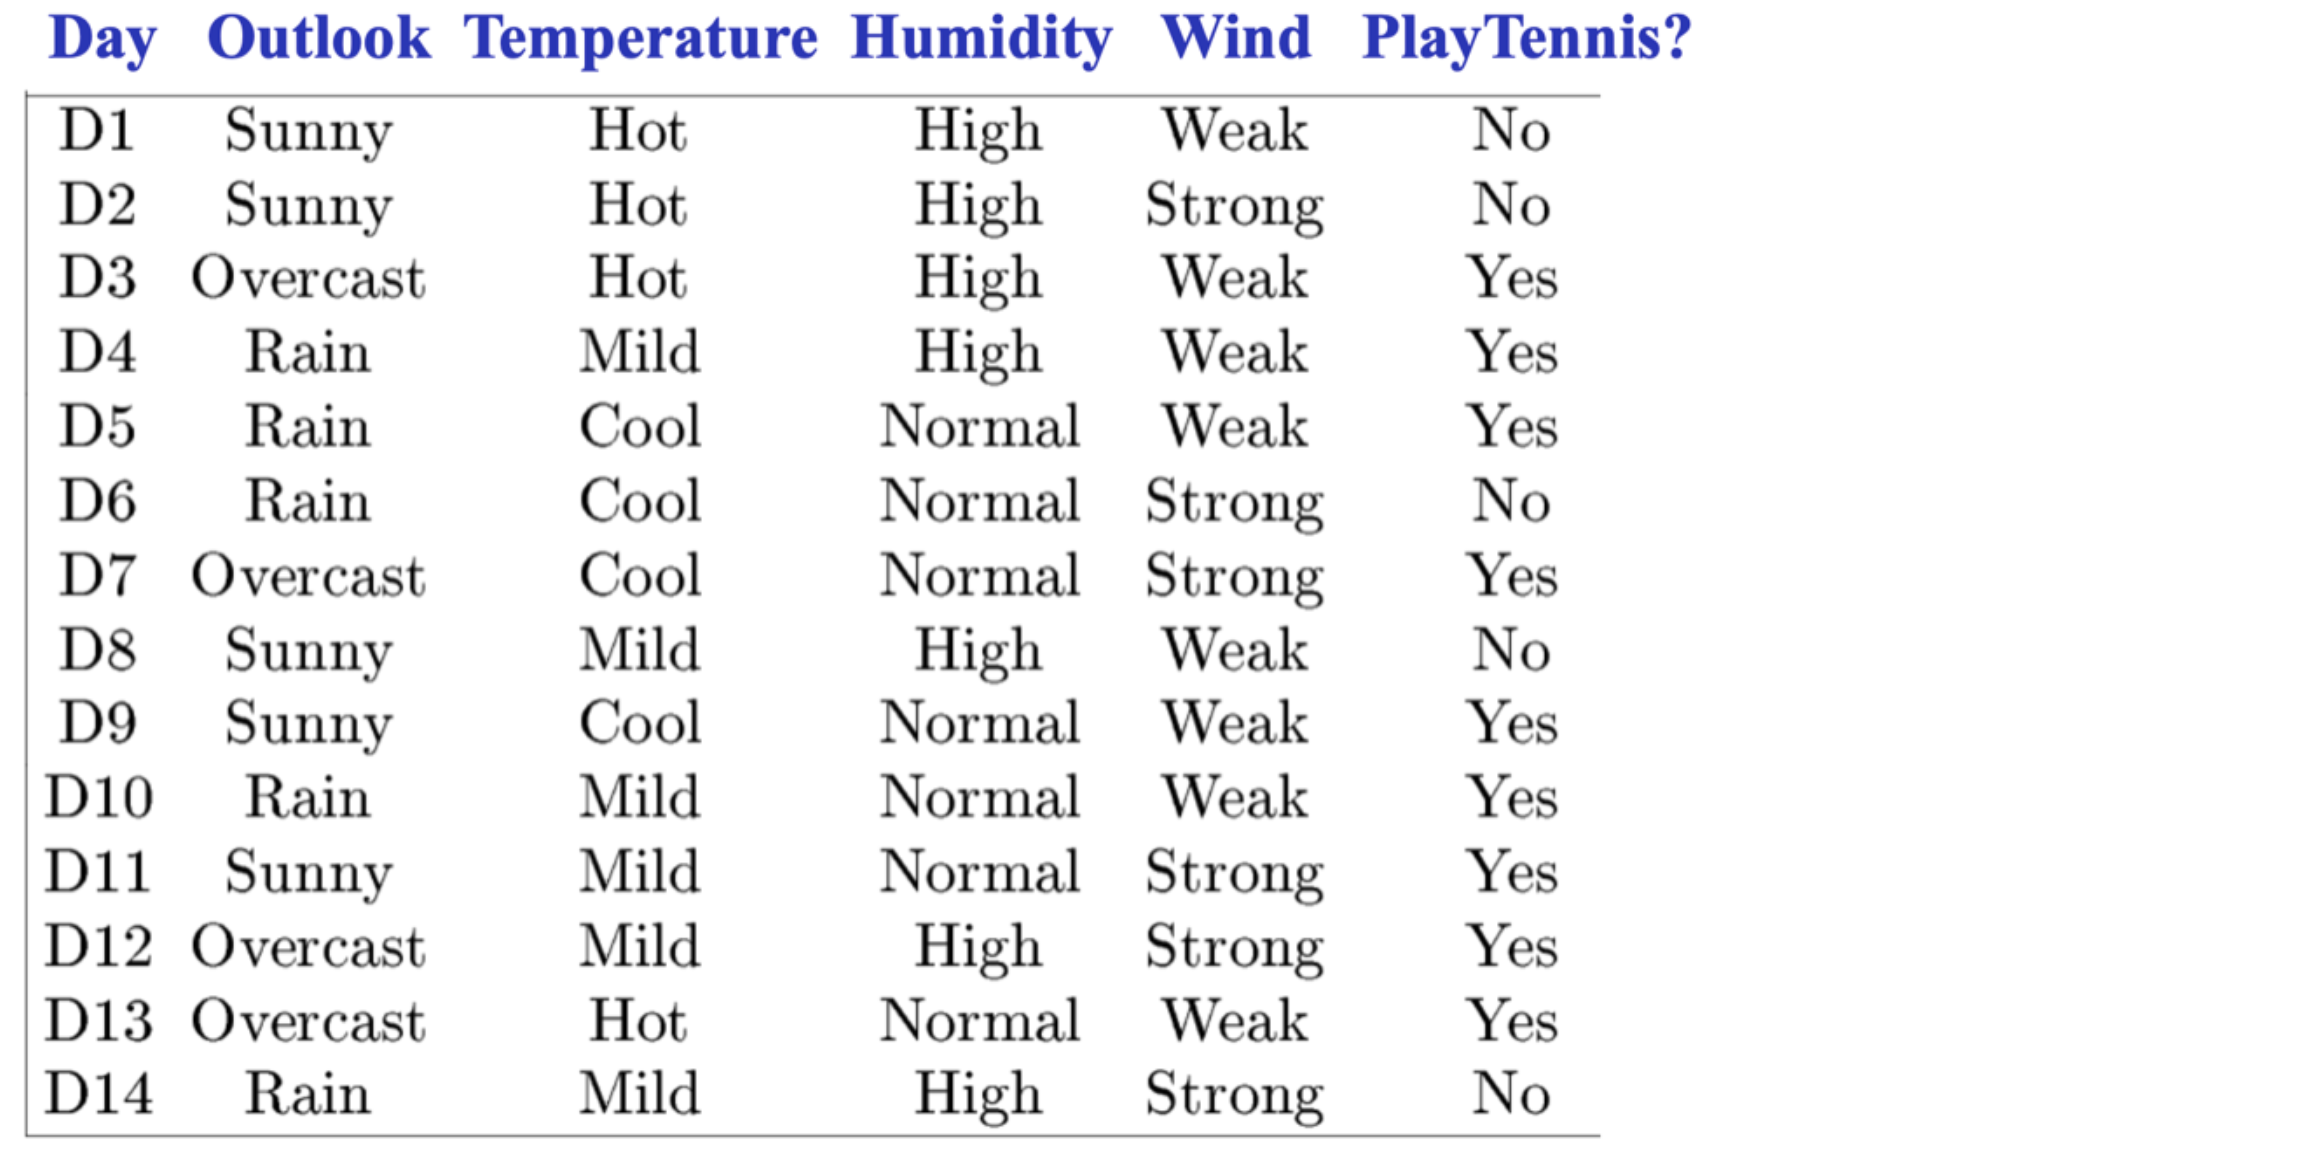

### PLAY TENNIS?
- A Decision tree for $f$: (Outlook, Temperature, Humidity, Wind) $\rightarrow$ PlayTennis?
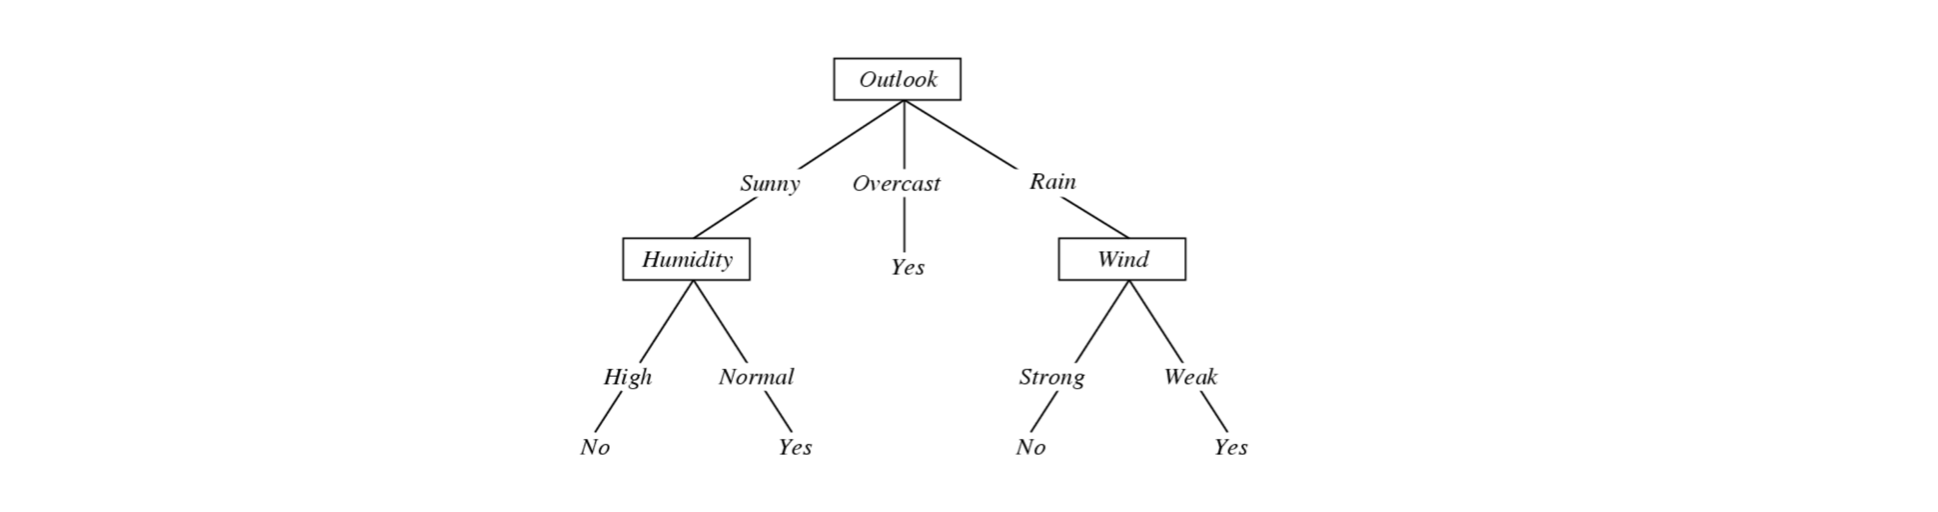
- Each internal node: test one discrete-valued attribute $X_d$
- Each branch from a node: selects one value for $X_d$
- Each leaf node: predict $Y$ (or $P(Y | X \in \text{leaf})$)

Example: x=(Outlook=sunny, Temperature-Hot, Humidity=Normal,Wind=High), h(x)=Yes

## Function approximation

#### Problem setting:
- Set of possible instances $X$
    - example: Outlook, Temperature, Humidity, Wind
- Unknown target function $f:X\rightarrow Y$
    - example: Y is binary (play or not play)
- Set of candidate hypotheses $\mathcal{H}={h | h:X\rightarrow Y}$
    - example: each $h$ is a decision tree




### Decision tree example

- Suppose $X = (X_1,X_2,… X_n)$ where $X_i$ are boolean-valued variables

- How would you represent $Y = X2\land X5?$ $~ ~ ~ ~ ~ $ $Y = X2\lor X5?$ 

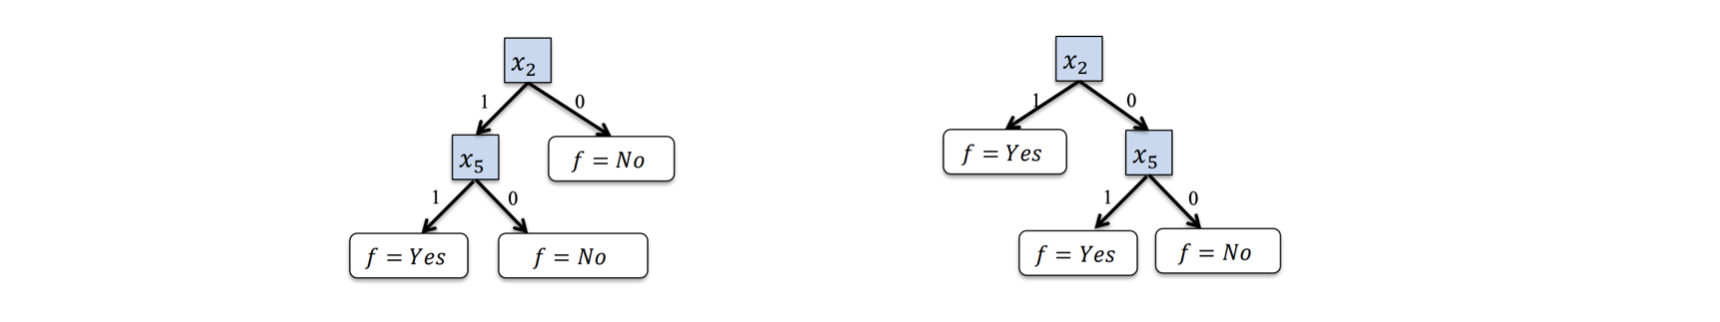

How would you represent $X_2X_5\lor X_3X_4(\neg X_1)?$

### Example with training data
Draw a tree that represents:

|$$X_1$$|$$X_2$$|$$X_3$$||$$Y$$|
|:-:|:-:|:-:|:-:|:-:|
|0|0|0||0|
|0|0|1||0|
|0|1|0||1|
|0|1|1||1|
|1|0|0||1|
|1|0|1||1|
|1|1|0||1|
|1|1|1||1|


- The order we pick the attributes affects the size (and efficiency) of the tree.

## How to choose the best hypothesis?

- How to automatically find a good hypothesis for training data?
    - A core algorithmic question.

- When do we generalize and do well on unseen data?
    - A learning theory question.
    - **Occam’s razor**: use the simplest hypothesis consistent with data!
    
    
- *Occam’s razor: Favor short hypotheses than long ones*
    - *a short hypothesis that fits the data is less likely to be a statistical coincidence*
    - *highly probable that a sufficiently complex hypothesis will fit the data*
    - *(remember this is a heuristic. read [here](https://machinelearningmastery.com/ensemble-learning-and-occams-razor/) for more discussion)*


## How to choose the best hypothesis?

- How to automatically find a good hypothesis for training data?
    - A core algorithmic question.

- When do we generalize and do well on unseen data?
    - A learning theory question.
    - **Occam’s razor**: use the simplest hypothesis consistent with data!

- Other core questions in machine learning:
    - How do we choose a hypothesis space?
        - Often we use prior knowledge to guide this choice
    - How to model applications as machine learning problems? 
        - engineering challenge

## How to choose the best Decision Tree?

- How to pick the smallest tree?
    - NP-hard [Hyafil-Rivest’76]!
    
- Luckily, we have very nice practical heuristics and top down algorithms (e.g, ID3) that can achieve a good solution

### Top-Down Induction of Decision Trees [examples ID3, C4.5, Quinlan]

- ID3: Natural greedy approach to growing a decision tree top-down (from the root to the leaves by repeatedly replacing an existing leaf with an internal node.).

- Algorithm main loop: 
     - Pick “best” attribute A to split at a node based on training data.
     - Assign A to this node.
     - For each value of A create new descendent.
     - Split training examples among the descendents.
     - If training examples perfectly classified in new node, stop, else recurse on node.


- How to know which attribute is best?

### Which attribute is best?

- ID3 uses a statistical measure called **information gain** (how well a given attribute separates the training examples according to the target classification)


- Information Gain of variable $A$ is the expected reduction in entropy of target variable $Y$ for data sample $S4$, due to sorting on variable $A$

$$\text{Gain}(S,A) = H_S(Y) - H_S(Y|A)$$


- Entropy ($H_S$) is information theoretic measure that characterizes the complexity of a labeled set 𝑆.

### Entropy

- Sample Entropy of a Labeled Dataset
    - $𝑆$ is a sample of training examples
        - $p_1$ is the proportion of positive examples in $𝑆$
        - $p_0$ the proportion of negative examples in $𝑆$
        
• Entropy measures the complexity of 𝑆:
$$H_S = - p_1 \log(p_1) - p_0 \log(p_0)$$
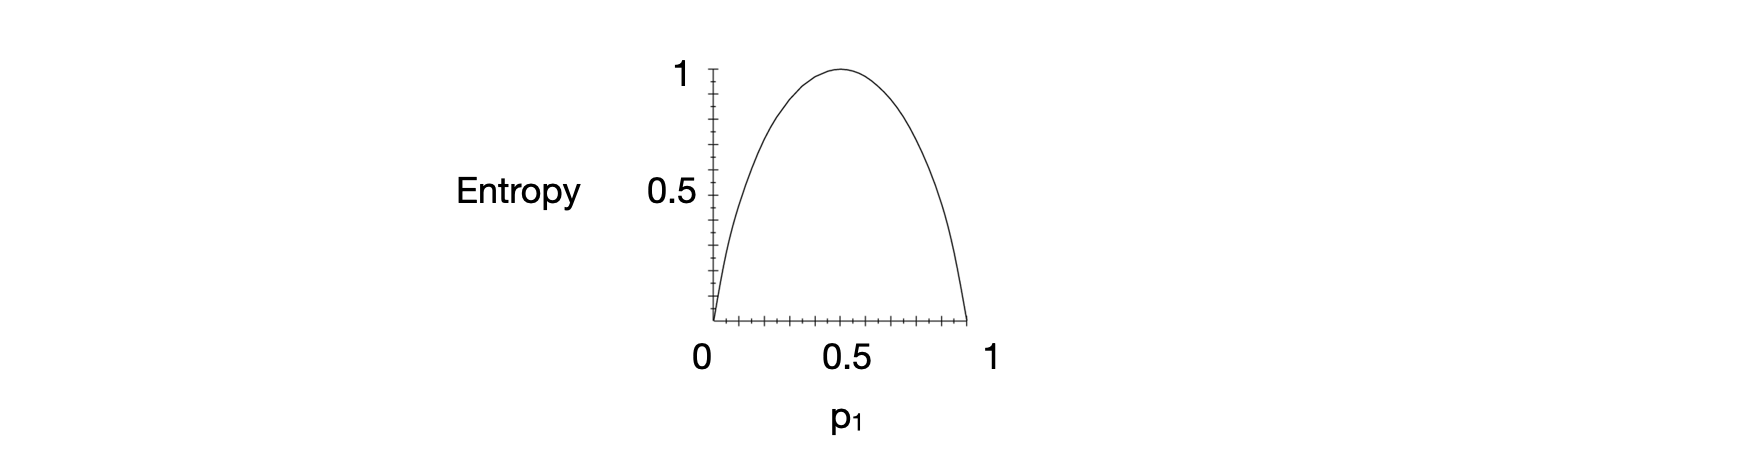

### Entropy


$$H_S = - p_1 \log(p_1) - p_0 \log(p_0)$$
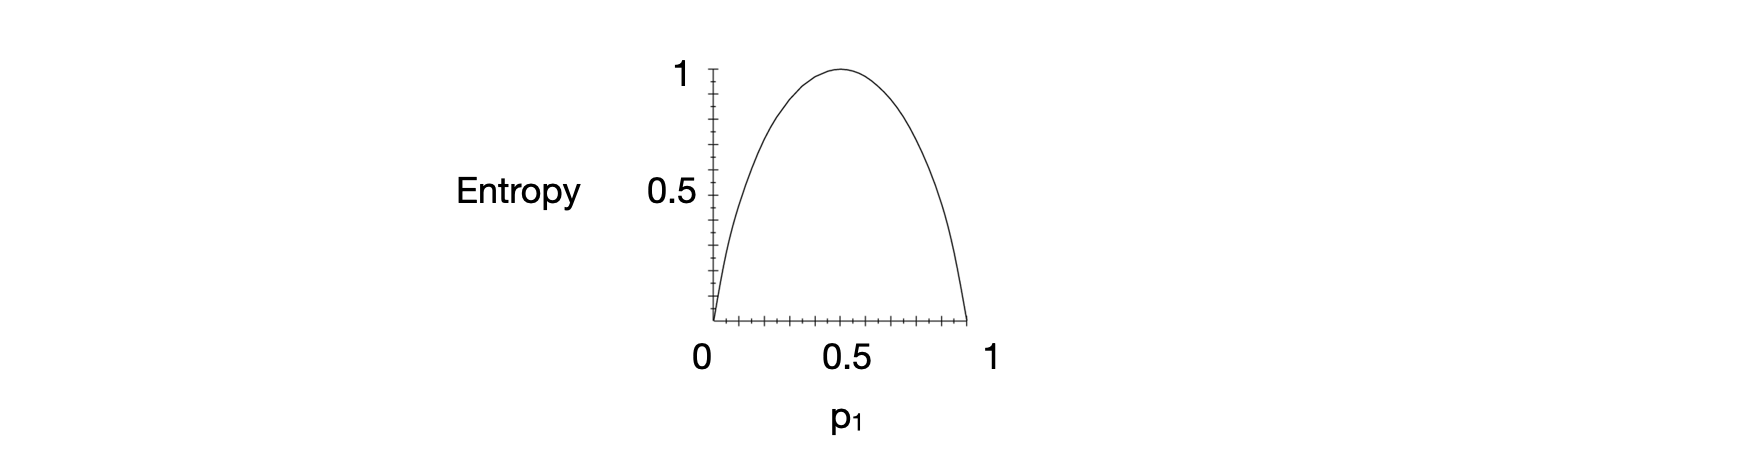
- E.g., if all negative, then entropy=0. If all positive, then entropy=0.
- If 50/50 positive and negative then entropy=1.
- If 14 examples with 9 positive and 5 negative, then entropy=.940


### If labels not Boolean

$$H_S = - \sum_{k=1}^c p_k \log_2(p_k)$$

E.g., if $c$ classes, all equally likely, then $p_k= \frac{1}{c}$ for all $k$  and $H_S = -\log_2\frac{1}{c}$

### Another way to understand maximizing information gain

- We want to be the farthest possible from all classes being equally likely (let's call this uniform distribution $q_k= \frac{1}{c}$ for all $k$). This can be done by finding another distribution $(p_1,...p_c)$ that maximizes the KL-Divergence (Kullback–Leibler divergence). 
\begin{align*}
    \text{KL}(p \parallel q) &= \sum_{k=1}^c p_k \log \frac{p_k}{q_k} 
\end{align*}
- The KL-Divergence is not a metric because it is not symmetric, i.e., $\text{KL}(p||q)\ne \text{KL}(q||p)$.


$
\text{KL}(p \parallel q) = \sum_{k=1}^c p_k \log \frac{p_k}{q_k} \geq 0 \quad \leftarrow \text{KL-Divergence}
$

$
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~= \sum_k p_k \log(p_k) - p_k \log(q_k) \quad \text{where } q_k = \frac{1}{c}
$

$
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~= \sum_k p_k \log(p_k) + p_k \log(c)
$


$
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~= \sum_k p_k \log(p_k) + \log(c) \sum_k p_k \quad \text{where } \log(c) \text{ is constant, } \sum_k p_k = 1
$

$
\max_p \text{KL}(p \parallel q) = \max_p \sum_k p_k \log(p_k)
$

$~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~= \min_p -\sum_k p_k \log(p_k) = \min_p H(s) \quad \leftarrow \text{Entropy} $

### Entropy of a split on variable A

- if binary:

$$ H_S = p_1 H_{S_1} + p_0 H_{S_0}$$
$$p_1 = \frac {|S_1|}{|S|}, ~ ~ ~ p_0 = \frac {|S_0|}{|S|}$$

- more generallly for $c$ classes:

$$ H_S = \sum_{k=1}^c \frac{|S_k|}{|S|} H_{S_k}$$


### Information gain of a split

- Information Gain of variable $A$ is the expected reduction in entropy of target variable $Y$ for data sample $S4$, due to sorting on variable $A$ (with $c$ values):

$$\text{Gain}(S,A) = H_S(Y) - H_S(Y|A)$$

$$\text{Gain}(S,A) = \text{Entropy}(S) - \sum_{k=1}^c  \frac{|S_k|}{S} \text{Entropy}(S_k)$$

- Gain(S,A) is the information provided about the target function, given the value of some other attribute A.

Learn concept PlayTennis (i.e., decide whether our friend will play tennis in a given day)
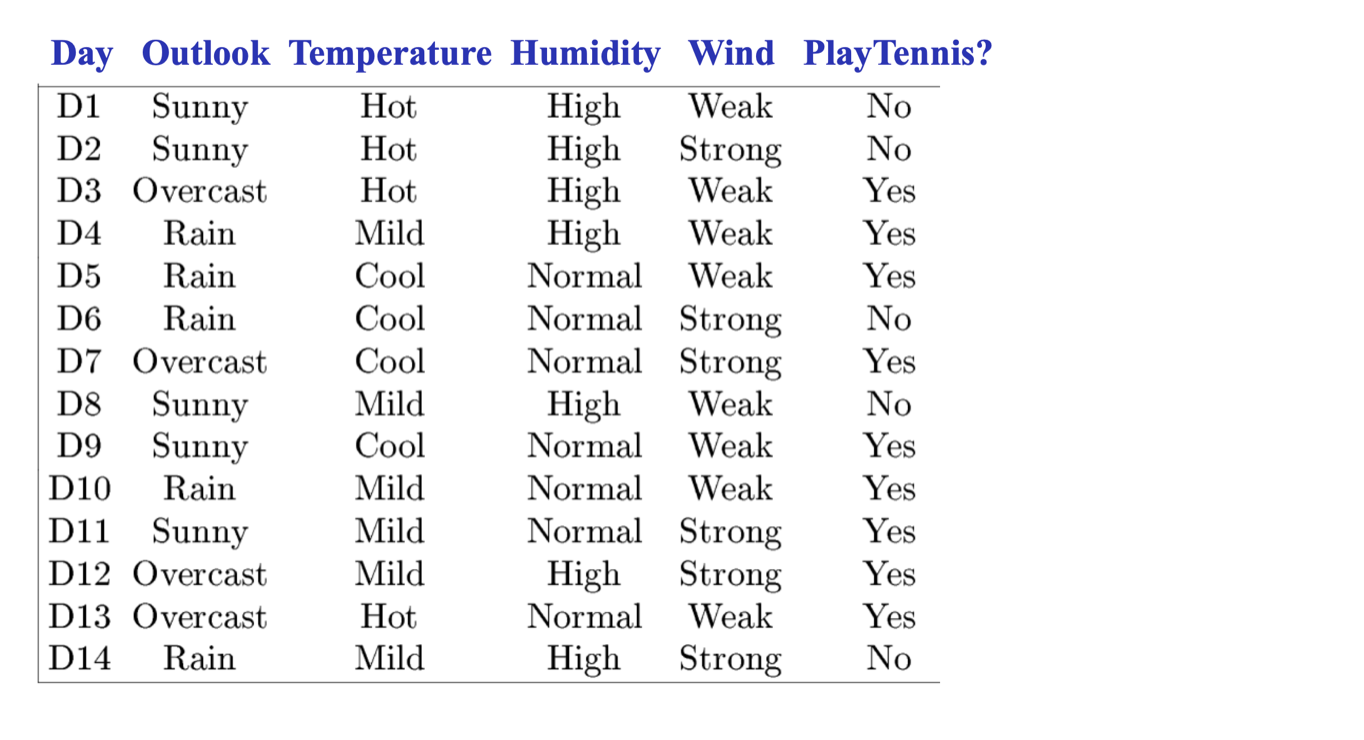

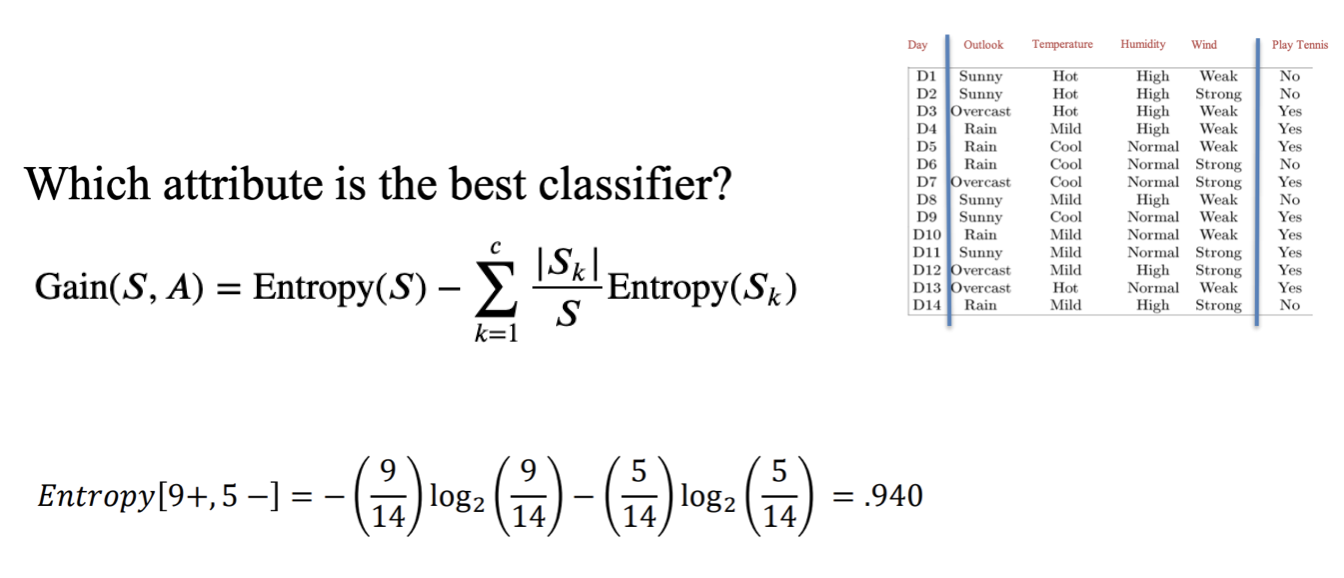

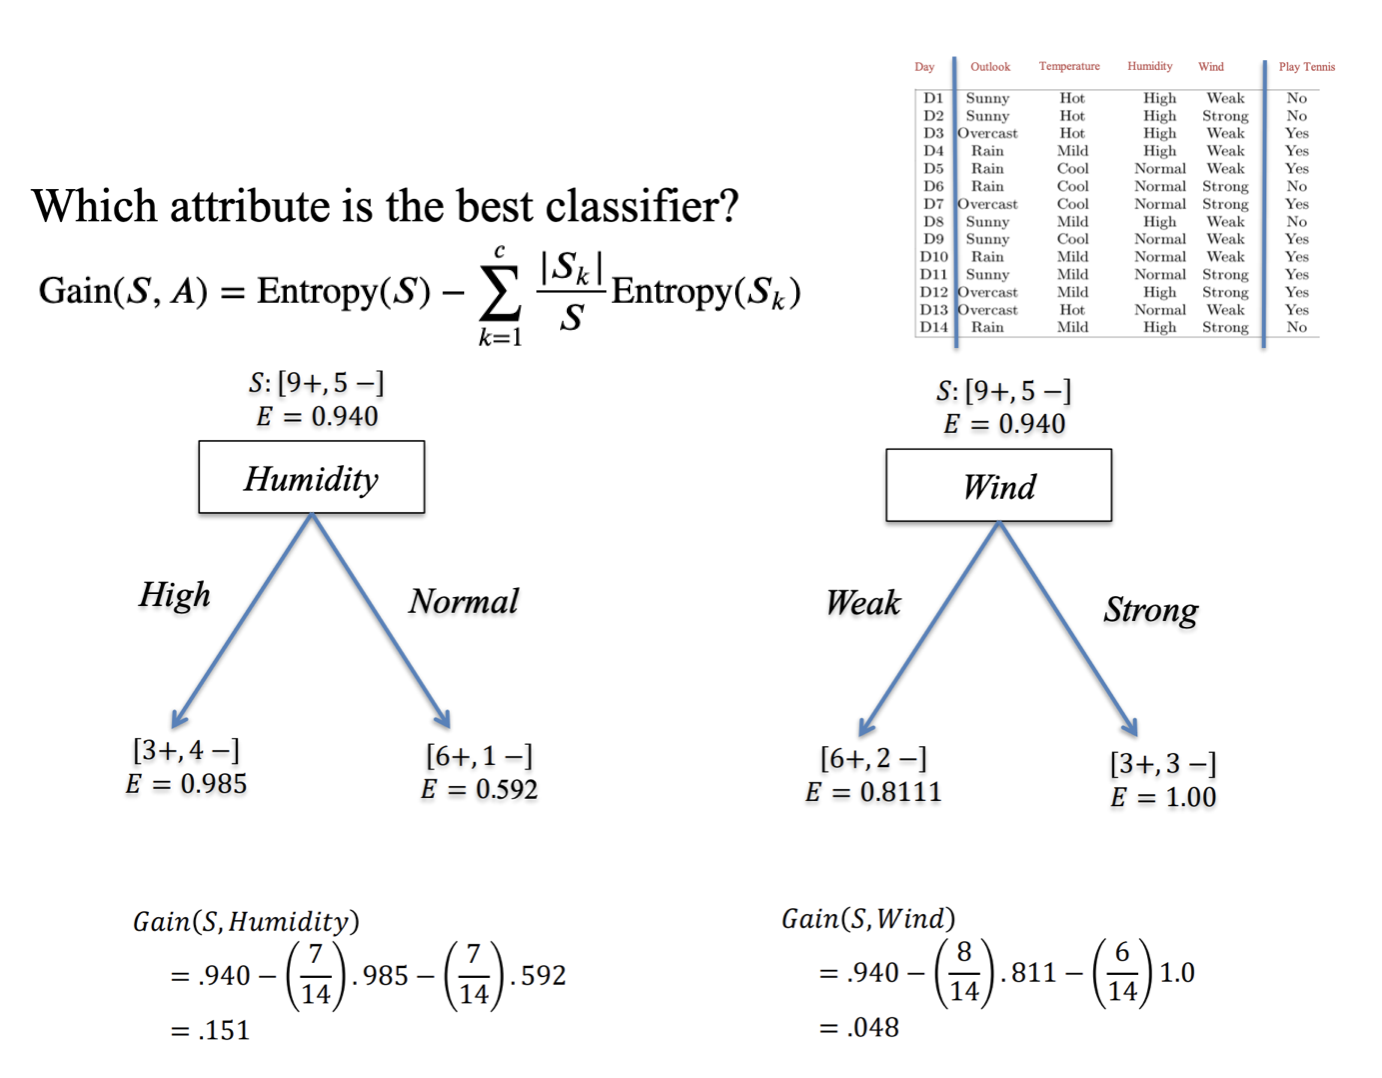

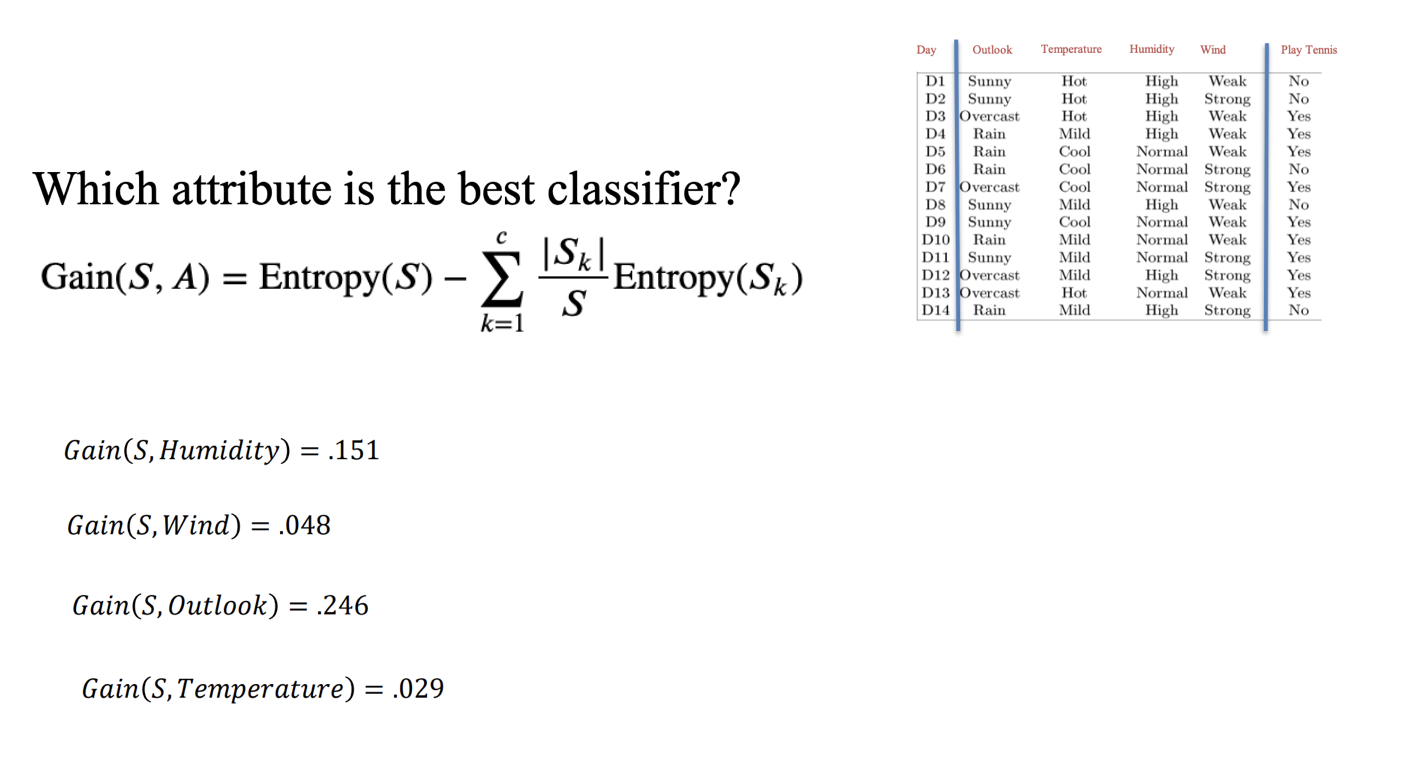

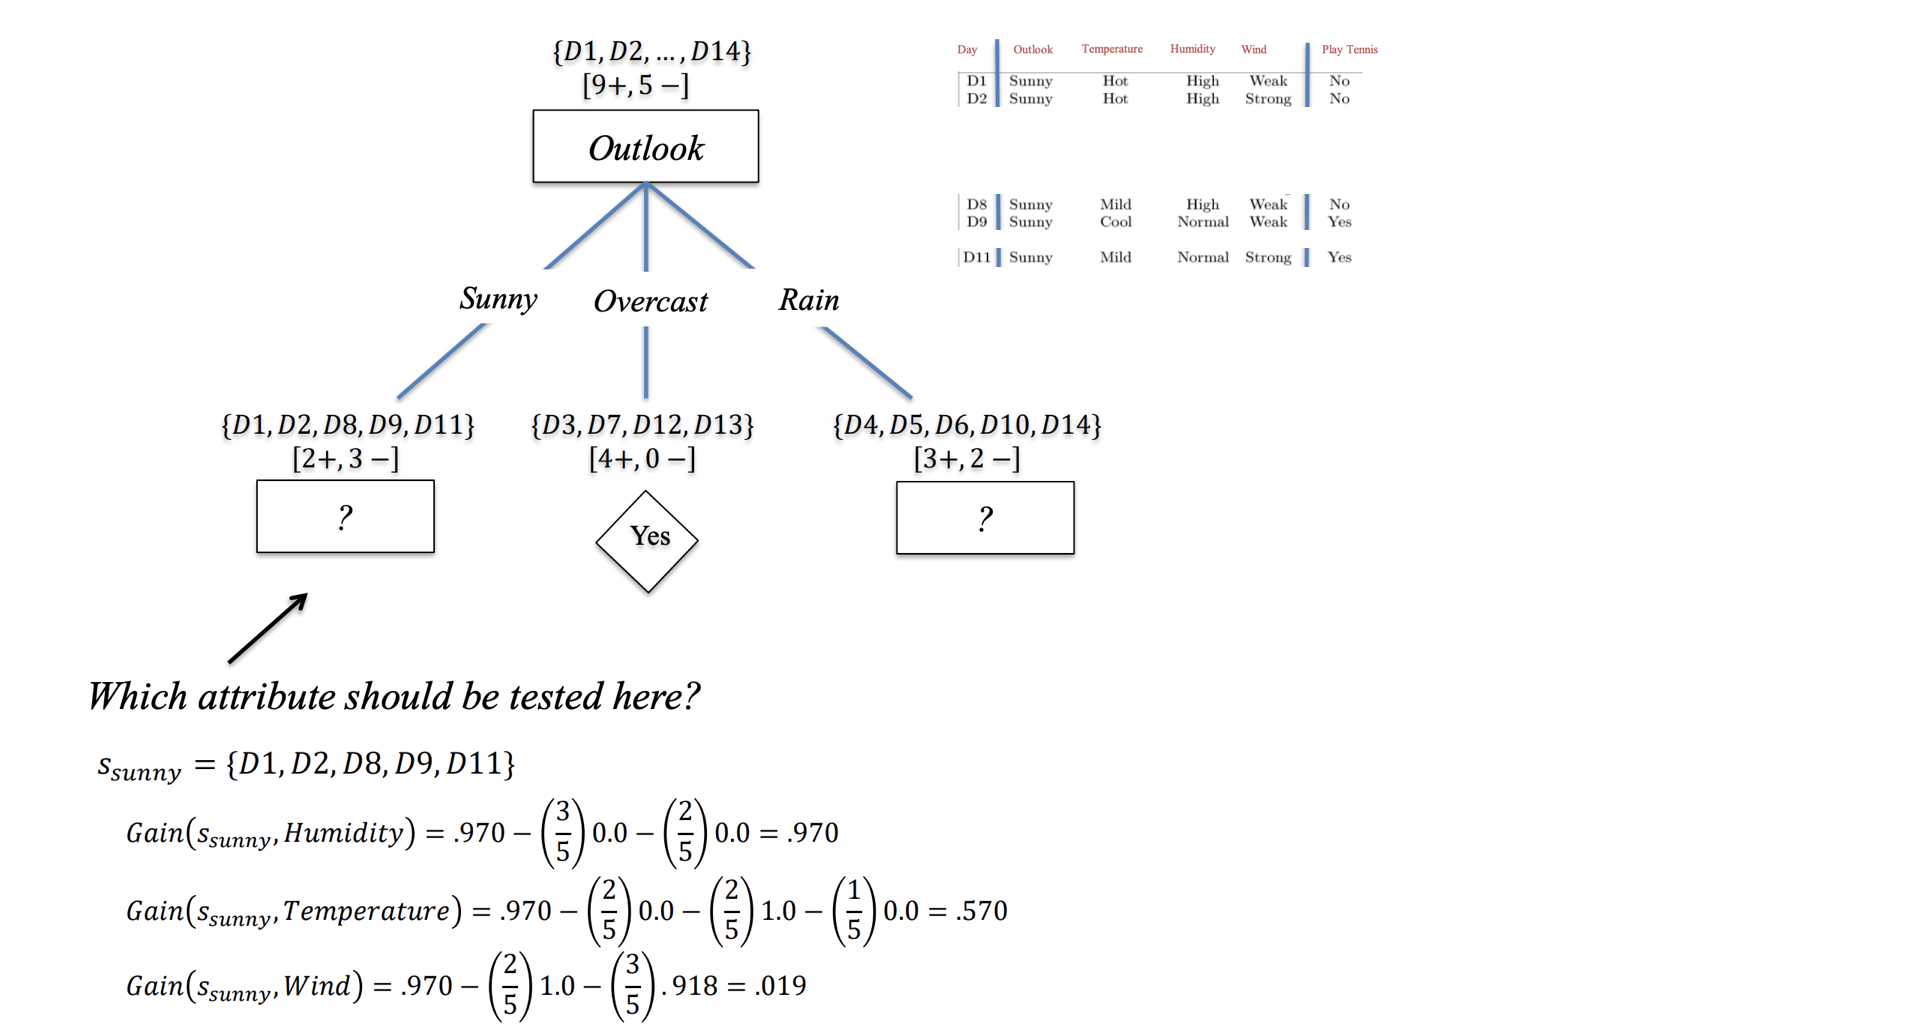

### Final decision tree

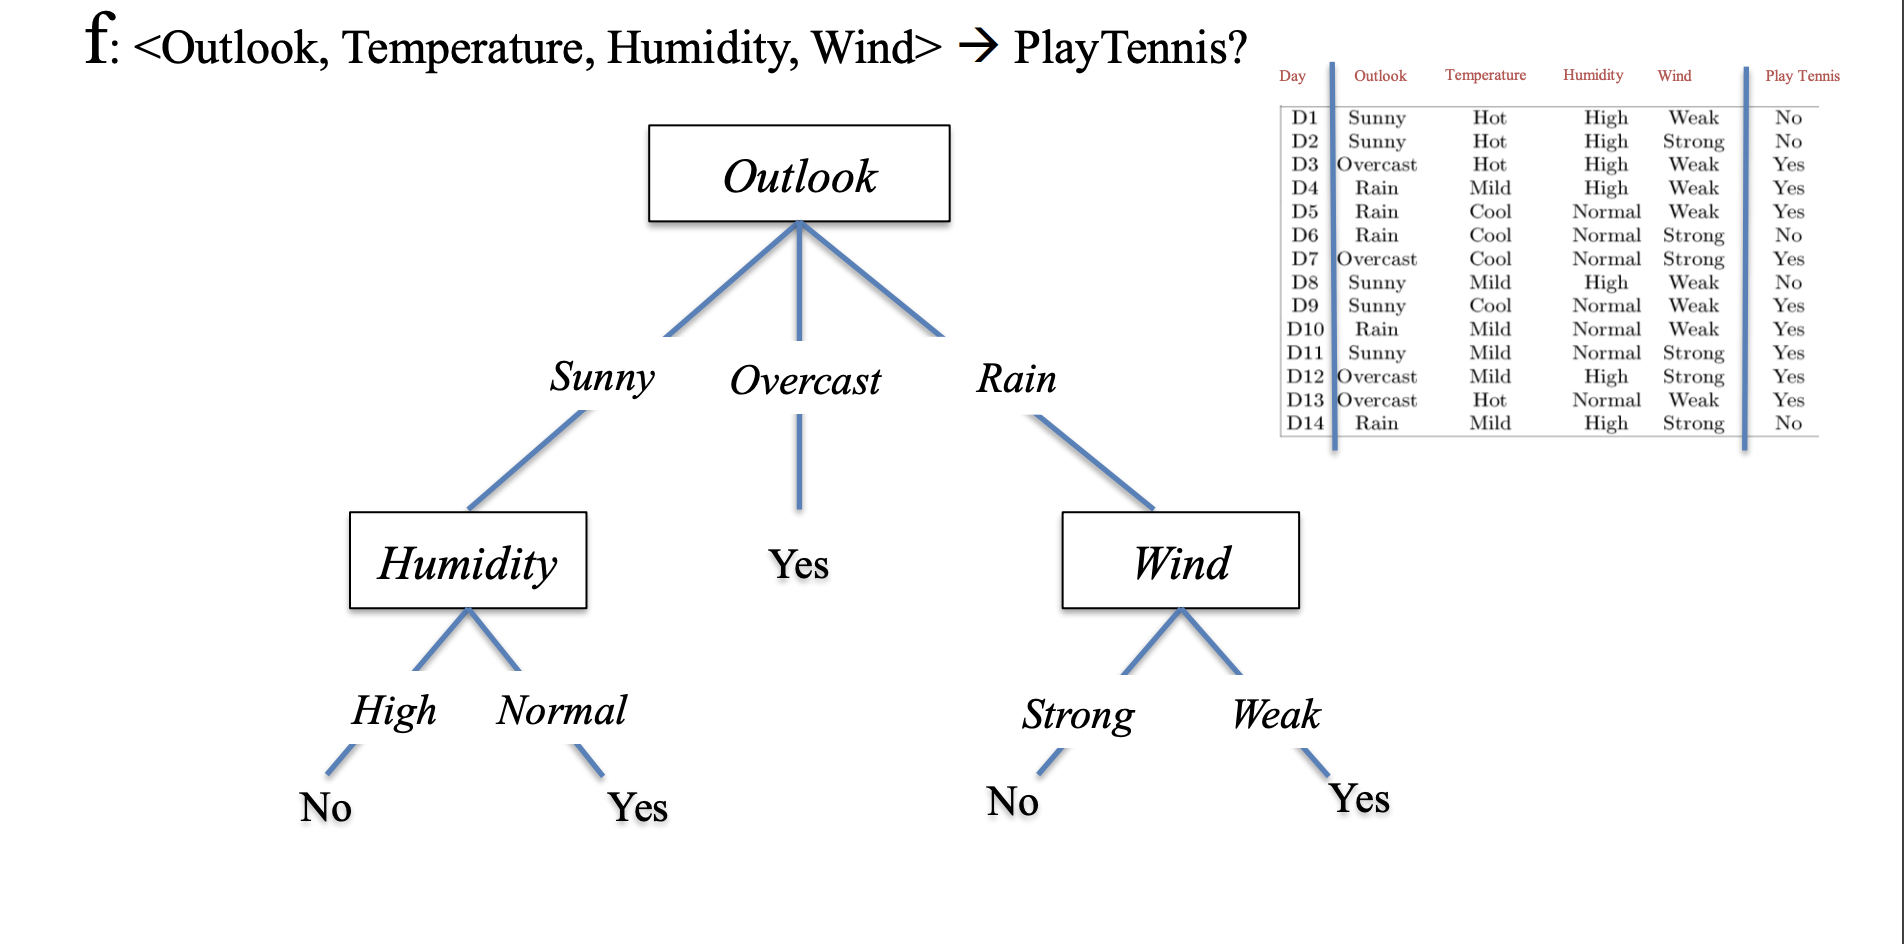

### Properties of ID3
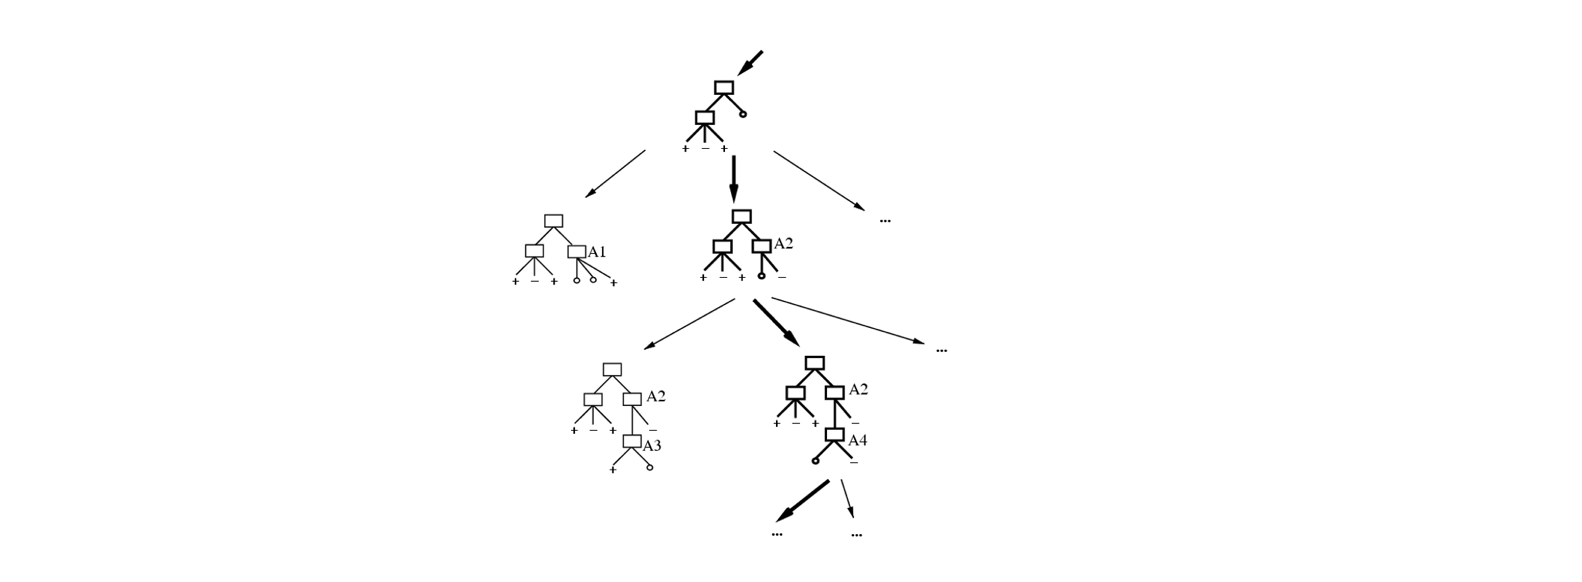
- ID3 performs heuristic search through space of decision trees.
- It stops at smallest acceptable tree. (Occam's razor).
- Still a greedy approach, might not find the shortest tree.

### ID3 might still overfit!

- Overfitting could occur because of noisy data and because ID3 is not
guaranteed to output a small hypothesis even if one exists.

- Consider adding a noisy example:
    - Sunny, Hot, Normal, Strong, PlayTennis = No
    
- The tree we learned would not be compatible with the training data
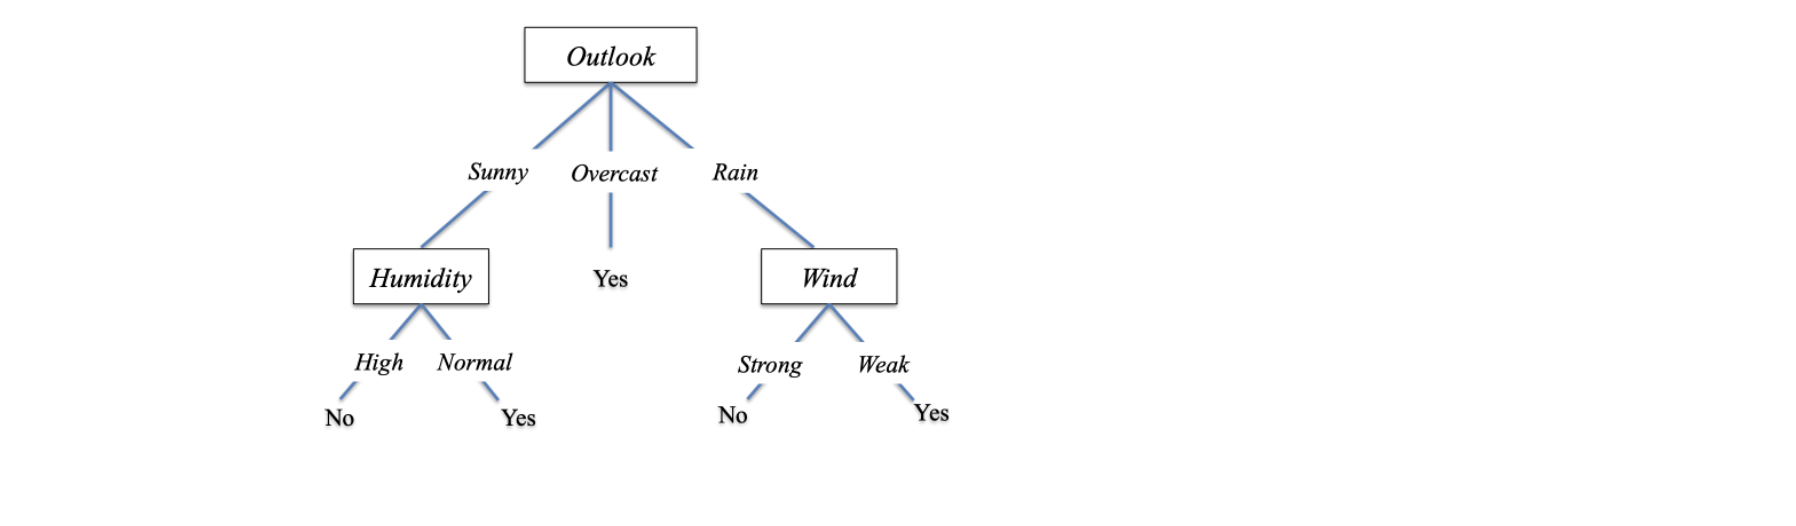

### Overfitting
- Consider a hypothesis h and its
    - Error rate over training data: $error\_train(h)$
    - True error rate over all data: $error\_true(h)$
    
    

    
- We say h overfits the training data if $error\_true(h) > error\_train(h)$
    - We typically don't know $error\_true(h)$ but we can estimate $error\_test(h)$ on a heldout set from the same distribution as the training data.

- Amount of overfitting = $error\_true(h)-error\_train(h)$

### Example of overfitting in ID3

Task: learning which medical patients have a form of diabetes.
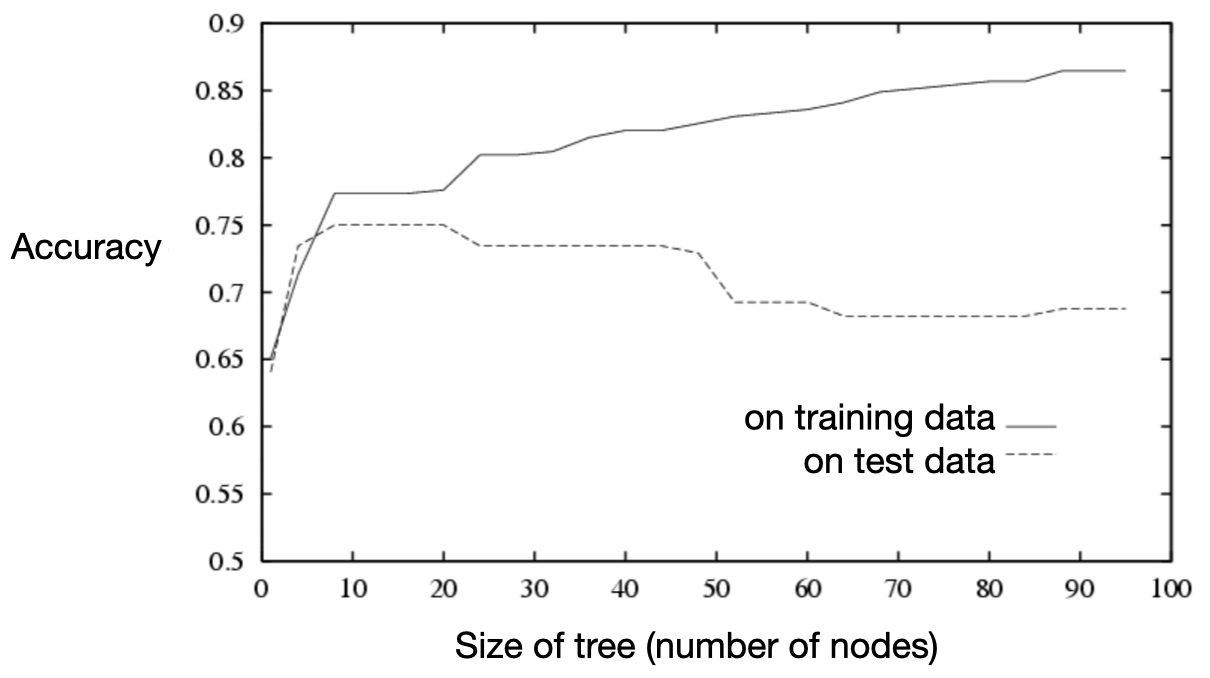


### How can we avoid overfitting?
- Stop growing when data split not statistically significant
- Grow full tree, then prune it

- example: Reduced Error Pruning
    - Split data into training set and validation set
    - Train a tree to classify training set as well as possible
    - Do until further pruning is harmful:
        1. For each internal tree node, consider making it a leaf node (pruning the tree below it)
        2. Greedily chose the above pruning step that best improves error over validation set
    - Produces smallest version of the most accurate pruned tree

### Effect of reduced error pruning
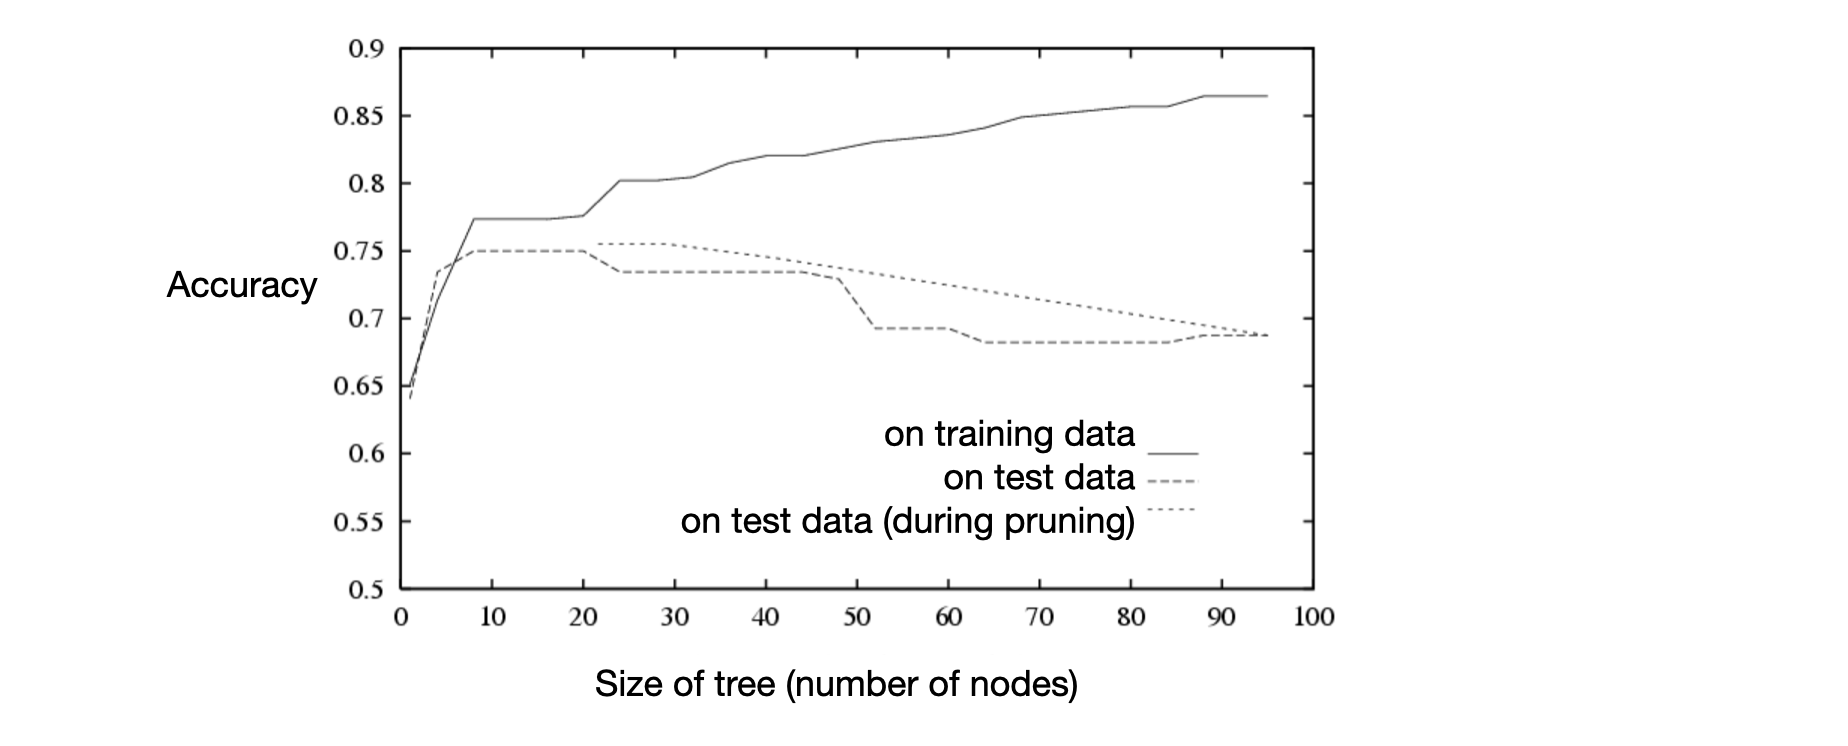
#### NOTE: the test set should NEVER be used for training. A separate validation set is used for making decisions about pruning.

### What if my attributes $X$ are real valued?

- Use a decision stump: for each attribute, consider splitting above, below
    - e.g. (is Temperature $\ge$ 72)

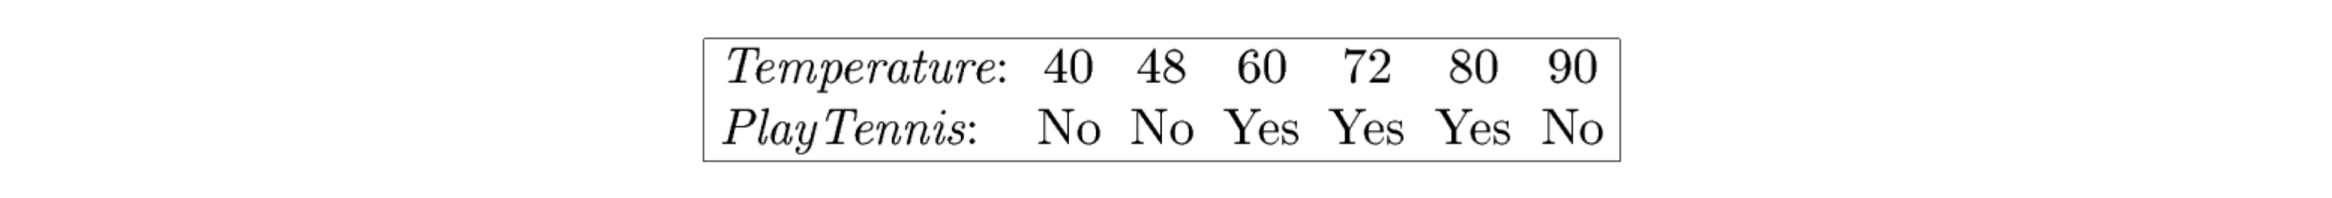

## Ensemble learning, bagging


- Using ensemble learning with trees makes them work very well in practice
    - instead of one tree, create a forest of trees and combine their prediction
    

- Bagging: resample the training dataset with replacement and average the trees
- Random forests: use subsets of the data (different features)

- Will see ensemble learning later in the couse 